In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current directory and work relative to it
#os.chdir('D:/Practical Time Series')

In [3]:
"""
Let us shown an example of resampling to a given frequency
"""

'\nLet us shown an example of resampling to a given frequency\n'

In [4]:
#Read dataset into pandas DataFrame
df = pd.read_csv('../datasets/chemical-concentration-readings.csv')

In [5]:
#Let's see the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (197, 2)


In [6]:
#Let's see first 10 rows of the DataFrame
df.head(10)

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [7]:
#The observations seem to be taken at an interval of 2 hours

In [8]:
#Parse the timestamp to datetime row index of the DataFrame
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [13]:
#Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

Text(0, 0.5, 'Chemical concentration')

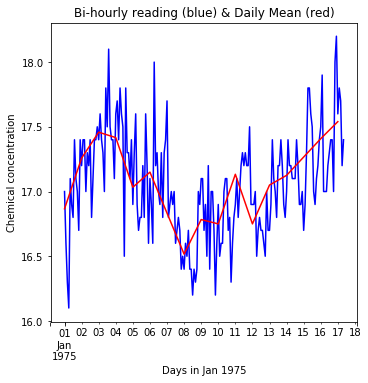

In [14]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

#plt.savefig('plots/ch2/B07887_02_02.png', format='png', dpi=300)

In [15]:
"""
Let us shown an example of grouping by a period
"""

'\nLet us shown an example of grouping by a period\n'

In [18]:
#Load the DataFrame and re-index the row to datetime64
df = pd.read_csv('../datasets/mean-daily-temperature-fisher-river.csv')
print(df.head(10))
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

         Date  Mean temparature
0  1988-01-01            -23.00
1  1988-01-02            -20.50
2  1988-01-03            -22.00
3  1988-01-04            -30.50
4  1988-01-05            -31.00
5  1988-01-06            -27.50
6  1988-01-07            -26.25
7  1988-01-08            -26.50
8  1988-01-09            -23.00
9  1988-01-10            -23.50


In [19]:
#Display shape of the DataFrame
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1461, 2)


In [20]:
#Let's see first 10 rows
df.head(10)

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.00
1988-01-02,1988-01-02,-20.50
1988-01-03,1988-01-03,-22.00
1988-01-04,1988-01-04,-30.50
1988-01-05,1988-01-05,-31.00
1988-01-06,1988-01-06,-27.50
1988-01-07,1988-01-07,-26.25
1988-01-08,1988-01-08,-26.50
1988-01-09,1988-01-09,-23.00


Text(0.5, 1.0, 'Mean daily temparature')

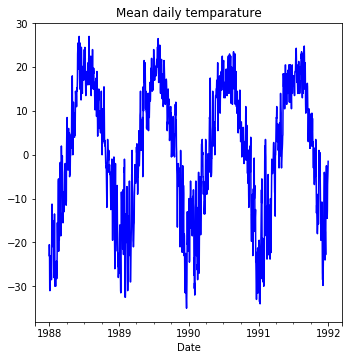

In [21]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

#plt.savefig('plots/ch2/B07887_02_03.png', format='png', dpi=300)

In [22]:
#We need to groupby the data for every month and find aggregate statistics

#Let's start by adding a Month_Year column
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

df.head(10)

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.00,01-1988
1988-01-02,1988-01-02,-20.50,01-1988
1988-01-03,1988-01-03,-22.00,01-1988
1988-01-04,1988-01-04,-30.50,01-1988
1988-01-05,1988-01-05,-31.00,01-1988
1988-01-06,1988-01-06,-27.50,01-1988
1988-01-07,1988-01-07,-26.25,01-1988
1988-01-08,1988-01-08,-26.50,01-1988
1988-01-09,1988-01-09,-23.00,01-1988


In [23]:
#Calculate month wise statistics
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [24]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


In [25]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
Month_Year,,,,,,
01-1988,01-1988,-22.137097,-23.000,5.260640,1988,01
02-1988,02-1988,-19.025862,-19.500,8.598522,1988,02
03-1988,03-1988,-8.258065,-9.250,5.341459,1988,03
04-1988,04-1988,2.641667,1.875,5.057720,1988,04
05-1988,05-1988,11.290323,11.000,6.254364,1988,05
06-1988,06-1988,19.291667,19.000,3.909032,1988,06
07-1988,07-1988,19.048387,18.500,3.073692,1988,07
08-1988,08-1988,17.379032,18.000,3.183205,1988,08
09-1988,09-1988,10.675000,10.750,3.880294,1988,09


Text(0.5, 1.0, 'Monthly statistics: Mean (blue) & Std. Dev. (red)')

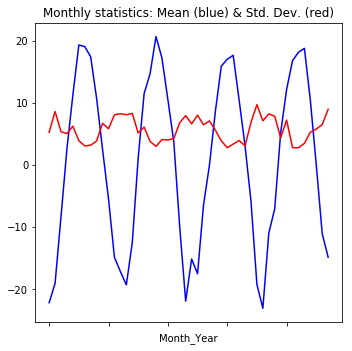

In [26]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

#plt.savefig('plots/ch2/B07887_02_04.png', format='png', dpi=300)

In [29]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [30]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [31]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

Text(0.5, 1.0, 'Monthly moving average')

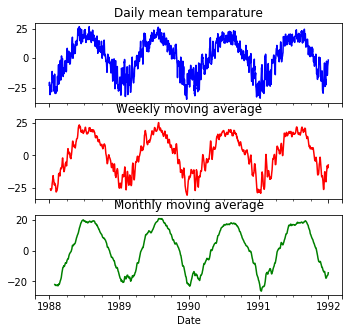

In [32]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

#plt.savefig('plots/ch2/B07887_02_05.png', format='png', dpi=300)